<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-17 05:55:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   213MB/s    in 0.5s    

2022-07-17 05:55:50 (213 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Model

In [ ]:
#input (batch, rows, columns, channel)
#Conv2D (batch, new_rows, new_columns, filters)
#MaxPool2D  (batch, pooled_rows, pooled_columns, channel)
#Flatten  (batch, multi-all)  #GlobalMaxPool2D (batch, channel)
#Dense (batch, units)

In [32]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rotation_range=0.2,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary") # type of problem we're working on
                                               
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  layers.Conv2D(10, 3, activation="relu"),
  layers.Conv2D(10, 3, activation="relu"), # activation='relu' == layers.Activations(tf.nn.relu)
  layers.MaxPool2D(2),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(1, activation="sigmoid") # binary activation output
])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [34]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [35]:
# Fit the model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=valid_data,
                    validation_steps=len(valid_data),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)])

Epoch 1/10
47/47 [==============================] - 23s 469ms/step - loss: 0.5745 - accuracy: 0.6700 - val_loss: 0.4016 - val_accuracy: 0.8260 - lr: 0.0010
Epoch 2/10
47/47 [==============================] - 23s 480ms/step - loss: 0.4545 - accuracy: 0.7960 - val_loss: 0.3757 - val_accuracy: 0.8420 - lr: 0.0010
Epoch 3/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4282 - accuracy: 0.8060 - val_loss: 0.3384 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 4/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4232 - accuracy: 0.8087 - val_loss: 0.3970 - val_accuracy: 0.8320 - lr: 0.0010
Epoch 5/10
47/47 [==============================] - ETA: 0s - loss: 0.4237 - accuracy: 0.8140
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
47/47 [==============================] - 22s 461ms/step - loss: 0.4237 - accuracy: 0.8140 - val_loss: 0.3486 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 6/10
47/47 [==============================] - 23s 481m

In [36]:
model.evaluate(valid_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3074 - accuracy: 0.8760


[0.3073863685131073, 0.8759999871253967]

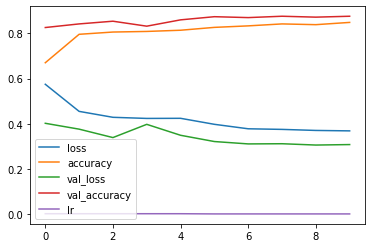

In [37]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save("model.h5")